# 1. EXPLORATORY ANALYSIS
<br>
For any data science project it is important to conduct exploratory analysis before building a model. In a real-world scenario, it is rare for data to be structured and ready for use. Perhaps, it is important to familiarize with the data we are working with. In our case, the data comes from the Kaggle competition -["Quora Question Pair"](https://www.kaggle.com/c/quora-question-pairs) and has been cleaned/structured for the users to use. As the first step of our analysis, we will conduct the following exploratory procedures on our data:

1.1 Viewing the schema of the train and test dataset 
<br>
1.2 Identifying the distribution of duplicate questions in the train dataset 
<br>
1.3 Performing topic modeling in the train dataset 
<br>
1.4 Creating word-cloud using questions in the train dataset 
<br>
1.5 Detecting/Removing stop words for the questions in the train dataset
<br>
1.6 Conducting cluster anlysis

## 1.1 Viewing Schema

In [2]:
import pandas as pd ## loading Pandas library for data import 

In [14]:
train_data = pd.read_csv("C:/Users/bshukla/Desktop/NLP_project/quora-question-pairs/train.csv") ##importing the training dataset 
train_data.head() ## viewing the first five observations from the train dataset 

train_data["q1_q2"] = train_data["question1"].map(str) + train_data["question2"].map(str)
train_data["q1_q2"]

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404285    How many keywords are there in the Racket prog...
404286    Do you believe there is life after death?Is it...
404287                   What is one coin?What's this coin?
404288    What is the approx annual cost of living while...
404289    What is like to have sex with cousin?What is i...
Name: q1_q2, Length: 404290, dtype: object

The following observation can be infered from the train dataset:

- There are six columns:
    <br>
    <br>
    &ensp;&ensp; id:&ensp;uniqued id for each row
    <br>
    &ensp;&ensp; qid1:&ensp;unique id for question 1 that is in comparison
    <br>
    &ensp;&ensp; qid2:&ensp;uniques id for question 2 that is in comparison
    <br>
    &ensp;&ensp; question1:&ensp;text of the question1 that is in comparison
    <br>
    &ensp;&ensp; question2:&ensp;test of the question 2 that is in comparison
    <br>
    &ensp;&ensp; is_duplicate:&ensp;binary target variable with 1 assigned to duplicate questions and 0 assigned to non-duplicate questions 
    


The following observation can be infered from the test dataset:

- There are three columns:
    <br>
    <br>
    &ensp;&ensp; test_id:&ensp;uniqued id for each row
    <br>
    &ensp;&ensp; question1:&ensp;text of the question1 that is in comparison
    <br>
    &ensp;&ensp; question2:&ensp;test of the question 2 that is in comparison
    
Based on the data we have, because our test dataset does not have the target variable, we will need to split our train data into three parts:

- train (70%)
- validation (10%)
- test (20%)

Before the split, let's look at the number of observation in the test and train dataset:

In [7]:
train_data.shape

(404290, 6)

Based on the output above, we know that the train dataset has 404,290 observations and the test dataset has 2,345,796 observations. 

## 1.2 Target Variable Distribution

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
duplicate = train_data['is_duplicate'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(is_dup.index, is_dup.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_duplicate', fontsize=12)
plt.show()

NameError: name 'is_dup' is not defined

<Figure size 648x360 with 0 Axes>

## 1.3 Topic Modeling

Topic modelling will be useful in identifying the various topics discussed in question 1 versus question 2 in the train dataset. 

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import re

In [17]:
## preparing data for topic modelling:
import re
# Remove punctuation for question 1:
train_data["question1_processed"] = train_data['question1'].str.replace('[^\w\s]','')
# Convert the questions to lowercase for question 1: 
train_data['question1_processed'] = train_data['question1_processed'].str.lower()
# Print the first rows of processed question 1:
train_data['question1_processed'].head()

# Remove punctuation for question 2:
train_data["question2_processed"] = train_data['question2'].str.replace('[^\w\s]','')
# Convert the questions to lowercase for question 2: 
train_data['question2_processed'] = train_data['question2_processed'].str.lower()
# Print the first rows of processed question 2:
train_data['question2_processed'].head()

train_data["q1_q2"] = train_data["question1_processed"].map(str) + train_data["question2_processed"].map(str)
train_data["q1_q2"]

train_data
train_data.to_excel(r'C:\Users\bshukla\Documents\baseline.xlsx')

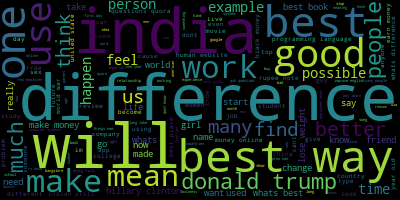

In [90]:
# Import the wordcloud library
from wordcloud import WordCloud

# creating a list of question 1 and joining it in a single string
q1_list = train_data['question1_processed'].tolist()
long_string = ' '.join(map(str, q1_list))

# Create a WordCloud object for question 1 
q1_wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=4, contour_color='pink')
# Generate a word cloud for question 1 
q1_wordcloud.generate(long_string)
# Visualize the word cloud for question 1 
q1_wordcloud.to_image()


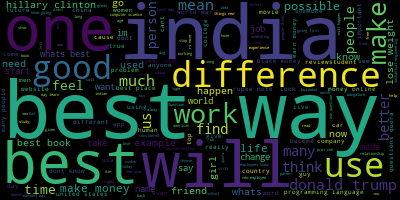

In [87]:
# creating a list of question 2 and joining it in a single string
q2_list = train_data['question2_processed'].tolist()
long_string2 = ' '.join(map(str, q2_list))

# Create a WordCloud object for question 2 
q2_wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=4, contour_color='steelblue')
# Generate a word cloud for question 2 
q2_wordcloud.generate(long_string2)
# Visualize the word cloud for question 2 
q2_wordcloud.to_image()


The top 20 words in question 1 are:


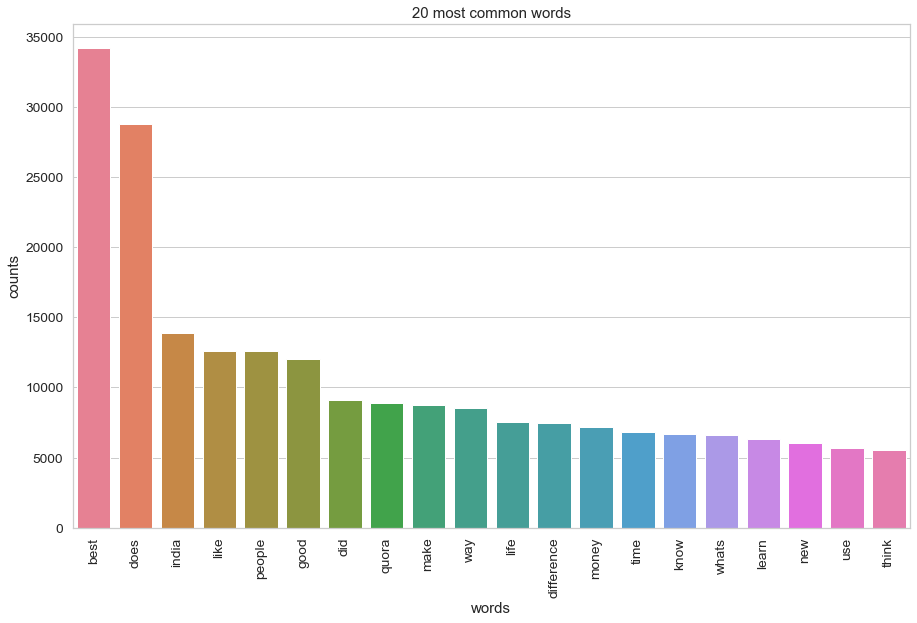

In [104]:
# loading important libraries
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text 
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform question 1 
count_data_q1 = count_vectorizer.fit_transform(train_data['question1_processed'].values.astype('U'))
# Visualise the 20 most common words
print("The top 20 words in question 1 are:")
plot_20_most_common_words(count_data_q1, count_vectorizer)

The top 20 words in question 2 are:


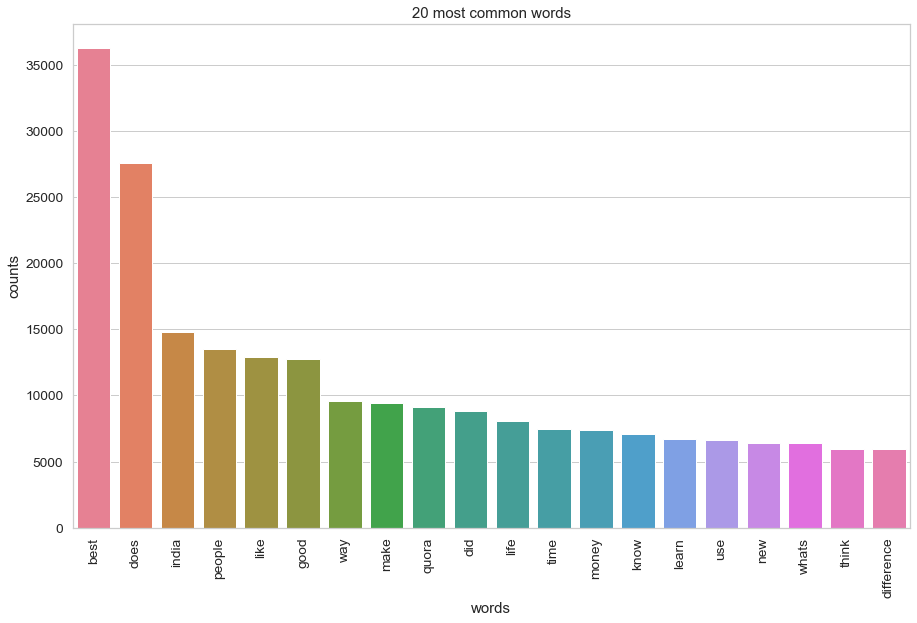

In [105]:
# Fit and transform question 2 
count_data_q2 = count_vectorizer.fit_transform(train_data['question2_processed'].values.astype('U'))
# Visualise the 20 most common words
print("The top 20 words in question 2 are:")
plot_20_most_common_words(count_data_q2, count_vectorizer)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_data['question1_processed'].values.astype('U'))

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
        plt.show()

Top terms per cluster:
Cluster 0:
 does
 quora
 money
 mean
 make
 earn
 online
 feel
 question
 like
Cluster 1:
 good
 india
 like
 life
 difference
 make
 learn
 time
 whats
 start
Cluster 2:
 people
 know
 quora
 dont
 things
 questions
 think
 ask
 employees
 new
Cluster 3:
 did
 battle
 trump
 win
 donald
 come
 start
 war
 election
 die
Cluster 4:
 best
 way
 learn
 india
 book
 books
 whats
 movies
 ways
 online


In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_data['question2_processed'].values.astype('U'))

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
        plt.show()

Top terms per cluster:
Cluster 0:
 money
 make
 500
 1000
 notes
 online
 earn
 rupee
 rs
 black
Cluster 1:
 whats
 best
 way
 difference
 thing
 like
 life
 youve
 favorite
 good
Cluster 2:
 does
 people
 like
 good
 india
 quora
 life
 did
 know
 make
Cluster 3:
 learn
 best
 programming
 language
 way
 english
 java
 python
 languages
 hacking
Cluster 4:
 best
 way
 india
 movies
 books
 book
 ways
 buy
 laptop
 time
